<a href="https://colab.research.google.com/github/aseddin/F23_ECE4715/blob/main/3_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

A simple model that generates predictions by computing a weighted sum of input features along with a bias term, sometimes referred to as an intercept.

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

* $\hat{y}$: is the predicted value
* $x_i$: is the $i^{th}$ feature value (There are $n$ features)
* $\theta_0$: is the bias term
* $\theta_i$: the $i$ feature weights
* $\theta_0, \theta_1, \theta_2 \dots$ are the the model parameters

We can express the linear regression equation in a vectorized form as follows:

$$\hat{y} = h_\theta(\bf{x}) = \theta_0 + \bf{\Theta}^T x$$

or if you augment $\bf{x}$ by 1:

$$\hat{y} = h_\theta(\bf{x}) = \bf{\Theta}^T \bf{x}$$

$\bf{\Theta}$ are the model parameters including the bias and $x_0$ is always 1. $h_{\theta}$ is the hypothesis function and it utilizes the model parameters $\bf{\Theta}$.

The training algorithm finds $\bf{\Theta}$ that minimizes a cost/loss function using the $m$ instances in the training set. For linear regression an appropriate loss function is the _root mean squared errors_:

$$\text{RMSE}(\bf{\Theta}) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2}$$

$$\text{RMSE}(\bf{\Theta}) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\bf{\Theta}^T \bf{x}^{(i)} - y^{(i)})^2}$$

Since the MSE is a positive function then minimizing it (or its root) should yeild similar results.

$$\text{MSE}(\bf{\Theta}) = \frac{1}{m}\sum_{i=1}^{m}(\bf{\Theta}^T \bf{x}^{(i)} - y^{(i)})^2$$

In [1]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
# Generate some linear looking data

m = 100 # number of instances
np.random.seed(42)
X = 2 * np.random.rand(m, 1) # column vector

theta0 = 4
theta1 = 3

y = theta0 + theta1 * X + np.random.randn(m, 1) # column vector

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100, 1)

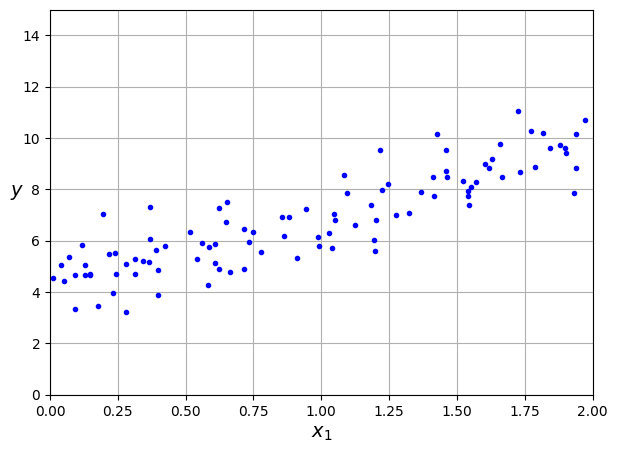

In [5]:
# plot the generated data

plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance (for the bias)
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [7]:
X_b.shape

(100, 2)

## The Normal Equation

The normal equation provides a closed-form solution for finding $\bf{\Theta}$  that minimizes the cost function:

$$
\text{MSE}(\bf{\Theta}) = \frac{1}{m} \sum_{i=1}^{m}(\bf{\Theta}^T \bf{x}^{(i)} - y^{(i)})^2
$$

The solution is closed-form, which means it is derived from a mathematical expression that directly yields the solution without requiring iterative approximations.

$$
\hat{\bf{\Theta}}=(\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{Y}
$$

$\hat{\bf{\Theta}}$ is the estimated value that minimizes the $\text{MSE}(\bf{\Theta})$

$X^{\dagger} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T$ is the left pseudo inverse of the (non-square) matrix $\bf{X}$. Specifically it is the Moore-Penrose inverse.




In [8]:
# The normal equation solution

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Best parameters=\n", theta_best)
print()
print("theta0=", theta0)
print("theta1=", theta1)

Best parameters=
 [[4.21509616]
 [2.77011339]]

theta0= 4
theta1= 3


It is easy to make predictions on a new input instance using `theta_best`

In [9]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot the model's predictions

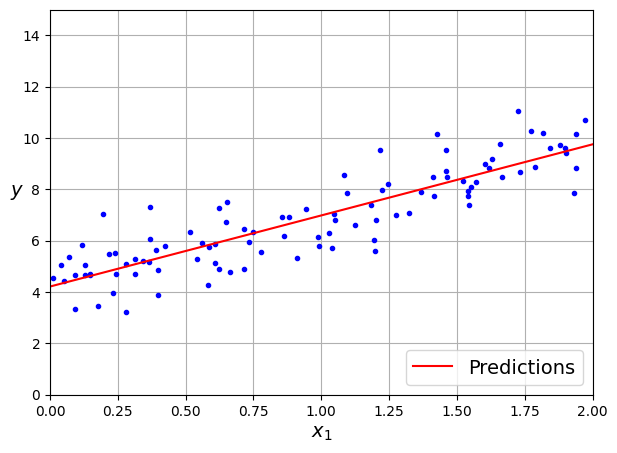

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="lower right")
plt.show()

If `np.linalg.inv` didn't work because $(\bf{X}^T\bf{X})^{-1}$ is not invertable. You can compute the pseudoinverse $X^{\dagger} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T$ using `np.linalg.pinv()` which utilizes SVD

$$
\hat{\bf{\Theta}}=X^{\dagger}\bf{Y}
$$

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

`sklearn`'s `LinearRegression` generates the same result

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("bias=", lin_reg.intercept_)
print("parameters=", lin_reg.coef_)

bias= [4.21509616]
parameters= [[2.77011339]]


In [13]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

Gradient descent is a versatile optimization technique employed to iteratively change a model's parameters to minimize a cost or loss function. For optimal results, it's advisable to use features of the same scale before applying gradient descent, for instance, by utilizing the `StandardScaler`.

In the upcoming sections, we will delve into three variations of Gradient Descent techniques:
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent

### Batch Gradient Descent

1. Pick a cost/loss function:

  For linear regression:

$$
\text{MSE}(\bf{\Theta}) = \frac{1}{m}\sum_{i=1}^{m} (\bf{\Theta}^{T}X^{(i)}-y^{(i)})^2
$$

2. Compute the gradient of the cost function with regard to each model parameter $\theta_j$

  $$
  \frac{\partial}{\partial \theta_j}\text{MSE}(\bf{\Theta}) = \frac{2}{m}
  \sum_{i=1}^{m} (\bf{\Theta}^T X^{(i)} - y^{(i)})x_j^{(i)}
  $$

  Partial derivatives can be computed all together with the following gradient vector:

$$
\nabla_\Theta \text{MSE}(\bf{\Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\bf{\Theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\bf{\Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}\text{MSE}(\bf{\Theta}) \\
\end{bmatrix}
= \frac{2}{m}X^T(X\Theta-y)
$$

3. Take a gradient step
$$
\bf{\Theta}^{\text{(next step)}} = \bf{\Theta}^{\text{(current step)}} - \eta \nabla_{\Theta} \text{MSE}(\bf{\Theta})
$$

  The gradient points uphill, to go downhill subtract $\nabla_{\Theta}\text{MSE}(\bf{\Theta})$ from $\bf{\Theta}$.
  
  $\eta$ is the learning rate and it controls the step size

4. Repeat (step 2 through 4) untill a certain condition is met (i.e. number of maximum epochs is reached, the norm of $\nabla_\Theta \text{MSE}(\bf{\Theta})$ is below a threshold $\epsilon$...etc)

At each gradient descent step, the full training set $\bf{X}$ is used; hence, it is called _**Batch**_ Gradient Descent. It is usally slow if the training set is very large; however, it scales well with the number of features and will perform much faster than the Normal Equation.

In [14]:
# Batch Gradient Descent

# Learning rate
eta = 0.1

# Number of epochs (i.e. steps)
n_epochs = 1000

m = len(X_b) # number of training instances

theta = np.random.randn(2, 1) # random initialization

theta_path_bgd = [] # will be used to compare with stochastic GD and mini-batch GD

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients
  theta_path_bgd.append(theta)


The learned model parameters:

In [15]:
theta

array([[4.21509616],
       [2.77011339]])

The results are identical to the Linear Regression outcomes.

In [16]:
print("bias=", lin_reg.intercept_)
print("parameters=", lin_reg.coef_)

bias= [4.21509616]
parameters= [[2.77011339]]


#### Showing the effect of the learing rate $\eta$

In [17]:
# Learning rate
#eta = 0.1 # converges
#eta = 0.02 # converges slowly
eta = 0.5 # diverges

epoch = 0

m = len(X_b) # number of training instances
X_new = np.array([[0], [2]]) # to plot the regressor

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

from sklearn.metrics import mean_squared_error

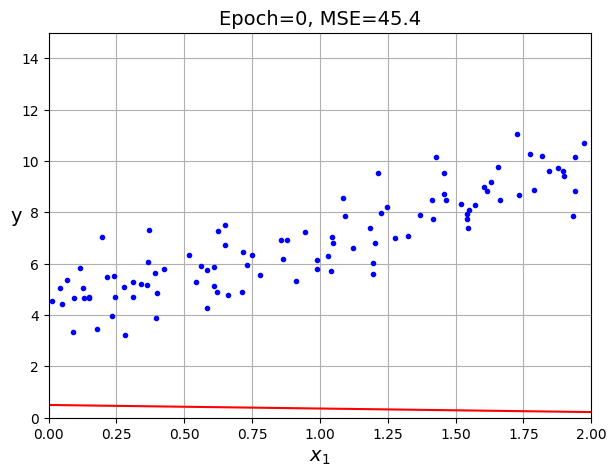

In [18]:
# run this cell several times to see how Gradient Descent progresses with each epoch

# plot the raw data points
plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

# compute the performance measure (MSE)
mse = mean_squared_error(y, X_b @ theta)
plt.title(f"Epoch={epoch}, MSE={mse:.3}")

y_new_predict = X_new_b @ theta
plt.plot(X_new, y_new_predict, 'r-')

epoch = epoch + 1
gradients = 2 / m * X_b.T @ (X_b @ theta - y)
theta = theta - eta * gradients

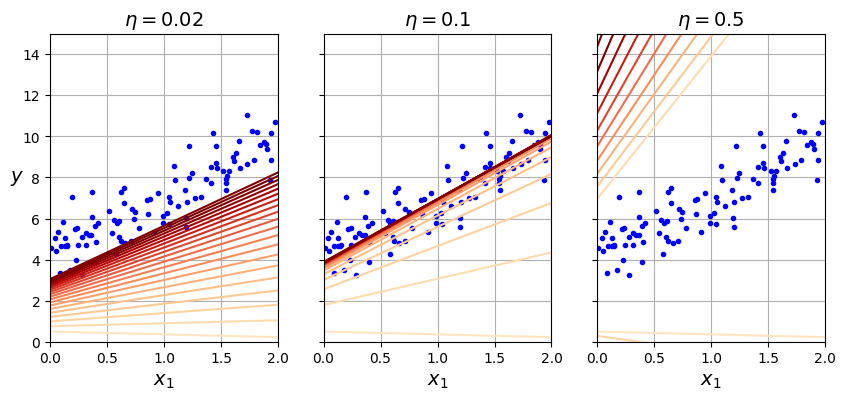

In [19]:
# Plot the first n_shown steps of gradient descent
# the color of the regressor gets darker and darker

import matplotlib as mpl

def plot_gradient_descent(theta, eta, n_shown=20):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(f"$\eta = {eta}$")

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

A grid search can be used to determine an appropriate learning rate $\eta$. To expedite the process, it's recommended to restrict the number of epochs in the grid search to exclude models that exhibit excessively slow convergence.

### Stochastic Gradient Descent (SGD)

Batch Gradient Descent utilizes the entire training dataset to compute gradients in each step, which can make it slower when dealing with large training sets. In contrast, Stochastic Gradient Descent (SGD) randomly selects a single instance from the training set to calculate the gradient at each training step. Stochastic Gradient Descent is notably faster as it deals with one instance at a time, but it also introduces more randomness compared to Batch Gradient Descent. The cost function exhibits fluctuations due to the random selection of instances; nevertheless, it tends to decrease on average over time.

The gradient vector for stochastic gradient descent is:

$$
\nabla_{\Theta} \text{MSE}(\bf{\Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\bf{\Theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\bf{\Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}\text{MSE}(\bf{\Theta}) \\
\end{bmatrix}
= 2{x^{(i)}}^T(x^{(i)}\Theta-y^{(i)})
$$

SGD doesn't converge to the optimal solution as it continuously fluctuates around it. One approach to address this issue is to adapt the learning rate dynamically using a learning schedule as the training progresses.

In [20]:
# Stochastic Gradient Descent

# Learning rate schedule
# learning schedule hyperparameters
t0, t1 = 5, 50
def learning_schedule(t):
  return t0 / (t + t1)

# Number of epochs
n_epochs = 50

m = len(X_b) # number of training instances

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

theta_path_sgd = [] # will be used to compare with batch GD and mini-batch GD

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

In [21]:
theta

array([[4.21076011],
       [2.74856079]])

It's important to note that SGD completed only 50 passes through the training set (in contrast to the 1000 passes in batch GD) and achieved comparable results faster.

#### Showing the progress of SGD

In [22]:
n_epochs = 50

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

epoch = 0
iteration = 0

m = len(X_b) # number of training instances
X_new = np.array([[0], [2]]) # to plot the regressor

from sklearn.metrics import mean_squared_error

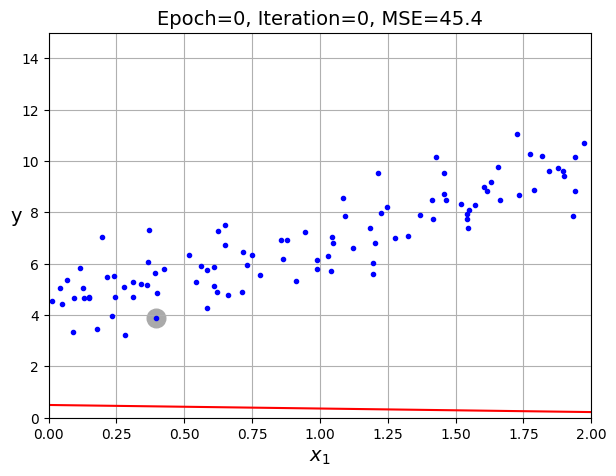

In [23]:
# run this cell several times to see how Stochastic Gradient Descent progresses with each step (not epoch)

# plot the raw data points
plt.figure(figsize=(7, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

# compute the performance measure (MSE)
mse = mean_squared_error(y, X_b @ theta)
plt.title(f"Epoch={epoch}, Iteration={iteration}, MSE={mse:.3}")

y_new_predict = X_new_b @ theta
plt.plot(X_new, y_new_predict, 'r-')

random_index = np.random.randint(m)
xi = X_b[random_index: random_index + 1]
yi = y[random_index: random_index + 1]
plt.scatter(xi[0][1], yi, s=180, zorder=-1, facecolors='#AAA')
gradients = 2 * xi.T @ (xi @ theta - yi)
eta = learning_schedule(epoch * m + iteration)
theta = theta - eta * gradients

iteration = iteration + 1
if iteration == m:
  epoch = epoch + 1
  iteration = 0


The  code above does not ensure that each instance will be utilized exactly once in every epoch. Put differently, some instances may be used multiple times while others may not be used at all within each epoch.

#### Using `SGDRegressor`

`sklearn` offers the `SGDRegressor` class for performing stohastic gradient descent regression.

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000, penalty=None, eta0=0.01,
    tol=1e-5, n_iter_no_change=100, random_state=42
)

# fit X not X_b as SGDRegressor will add the dummy feature automatically
# use y.ravel not y because fit() expects 1D targets of the shape (100, ) as opposed of (100, 1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Mini-Batch Gradient Descent

Batch Gradient Descent utilizes the entire training set in each iteration, while Stochastic Gradient Descent selects a single random instance from the training set at every training step. Mini-Batch Gradient Descent falls in between these two approaches by using small random subsets of instances, referred to as mini-batches, during each training step.

Mini-Batch Gradient Descent provides some performance improvements due to optimized hardware matrix operations. Moreover, it exhibits smoother parameter space traversal compared to Stochastic Gradient Descent, resulting in less erratic behavior.

The gradient vector for mini-batch gradient descent is:

$$
\nabla_\Theta \text{MSE}(\bf{\Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\bf{\Theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\bf{\Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}\text{MSE}(\bf{\Theta}) \\
\end{bmatrix}
= \frac{2}{\text{batch size}}{x^{(batch)}}^T(x^{(batch)}\Theta-y^{(batch)})
$$

In [26]:
# Mini-Batch Gradient Descent

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

# Learning rate schedule
# learning schedule hyperparameters
t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t + t1)

theta_path_mgd = []

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx:idx + minibatch_size]
    yi = y_shuffled[idx:idx + minibatch_size]
    gradients = 2/minibatch_size * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(iteration)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

In [27]:
theta

array([[4.2857119],
       [2.8119161]])

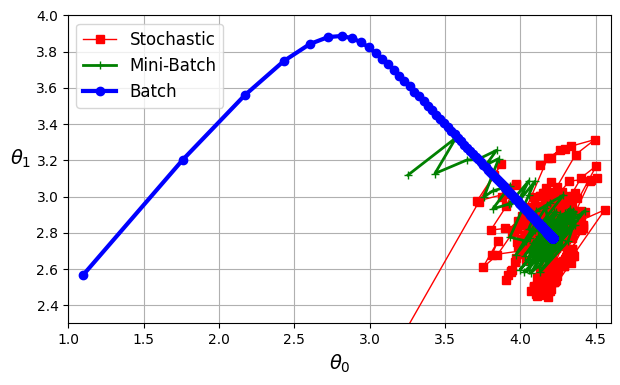

In [28]:
# Plot the parameter path taken using Batch GD, Stochastic GD, Mini-Batch GD

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")


plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$    ", rotation=0)
plt.axis([1, 4.6, 2.3, 4])

plt.grid()
plt.show()

## Polynomial Regression

When dealing with nonlinear data, a simple linear model (i.e. straight line) may not adequately capture its complexity. However, it is still possible to leverage a linear model by adding powers of each feature as new features, then train a linear model on this expanded feature set. This approach is known as _Polynomial Regression_.

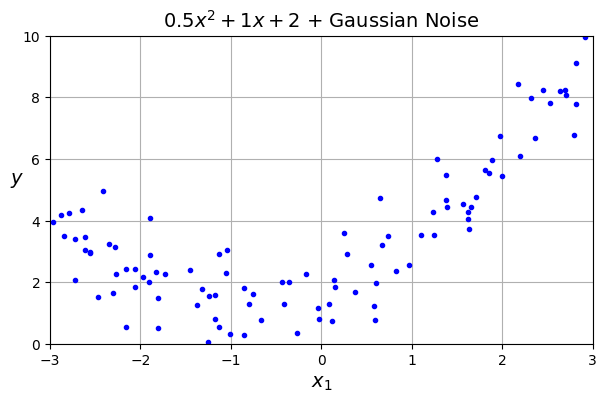

In [29]:
# Generate some nonlinear looking data

m = 100 # number of instances
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3 # random numbers between -3 and 3

theta0 = 2    # bias
theta1 = 1    # X
theta2 = 0.5  # X**2

# Simple quadratic equation
y = theta0 + theta1 * X + theta2 * X**2 + np.random.randn(m , 1)

plt.figure(figsize=(7, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.title(f"${theta2} x^2 + {theta1} x + {theta0}$ + Gaussian Noise")
plt.grid()
plt.show()

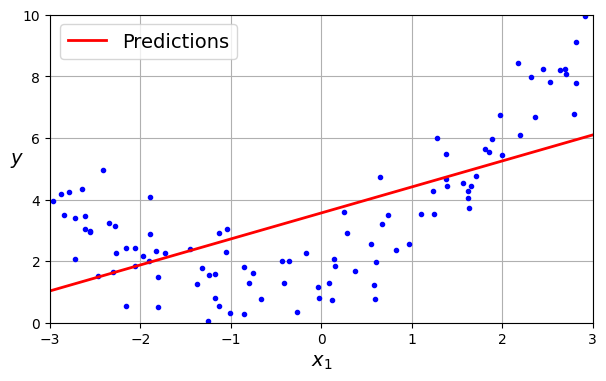

In [30]:
# Applying a linear model to nonlinear data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = [[-3], [3]]
y_new = lin_reg.predict(X_new)

plt.figure(figsize=(7, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left")
plt.grid()
plt.show()

Evidently, a line cannot fit the quadratic data properly so we should add polynomial features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
poly_features.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [33]:
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [34]:
# contains the original x and its square
X_poly[0:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

We only have 1 feature, so `PolynomialFeatures` with `degree=2` generated one new feature. If we have more features, then we would have gotten the `degree` of each feature and an interaction term between all combinations of features up to `degree`

In [35]:
# fit a linear model to the new polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(f"bias: {lin_reg.intercept_}")
print(f"parameters: {lin_reg.coef_}")

bias: [1.78134581]
parameters: [[0.93366893 0.56456263]]


In [36]:
# The true parameters
print(f"bias theta0: {theta0}")
print(f"parameters theta1 & theta2: {theta1}, {theta2}")

bias theta0: 2
parameters theta1 & theta2: 1, 0.5


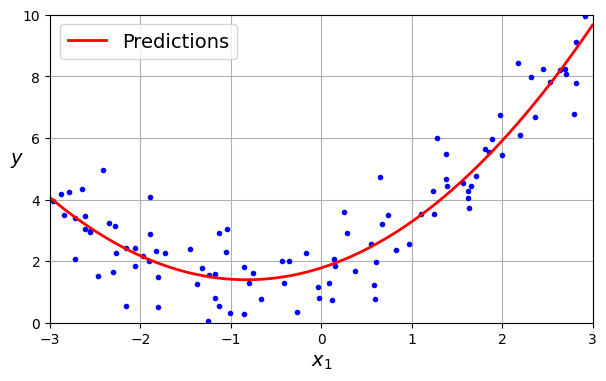

In [37]:
# plot the polynomial regressor

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(7, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

What if we fit higher degree polynomial to the data

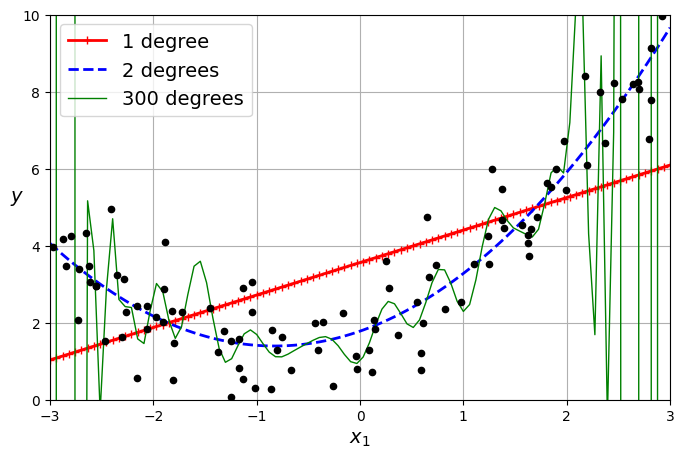

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(8, 5))

train_rmse_by_degree = {}
valid_rmse_by_degree = {}

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    # StandardScaler is necessary to make all features of the same scale
    # this is especially important for higher degree polynomials
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    train_rmse_by_degree[degree] = mean_squared_error(y, polynomial_regression.predict(X))
    valid_rmse_by_degree[degree] = -np.mean(cross_val_score(polynomial_regression, X, y, scoring='neg_root_mean_squared_error', cv=5))
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "k.", markersize = 9)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Clearly, the 300-degree polynomial outperforms lower-degree polynomials when it comes to fitting the training data. However, this isn't always an ideal outcome. The model is evidently **overfitting** the training data, which indicates it won't generalize well to new data.

The model that appears to generalize the best is the quadratic model (a second-degree model). This is reasonable because the data was generated using a quadratic equation. Nevertheless, in most cases, you won't have prior knowledge about the underlying data generation process. So, how should you determine the appropriate model complexity? How can you distinguish between overfitting and underfitting the data?

## Learning Curves

We can examine both the training and validation scores to gauge how well the model fits the data and whether it will generalize effectively. The comparison between training and validation performance helps us discern whether the model is overfitting or underfitting the data. Another valuable approach is to analyze **learning curves**, which consist of curves plotting the training and validation scores against the training iteration. The term "training iteration" can refer to:

- The epoch for models trained incrementally, such as those employing Gradient Descent.
- The training set size for models not trained incrementally, as seen in Linear Regression using the normal equation. In this case, the training set size is increased with each iteration, and the associated scores are recorded accordingly.

In [39]:
# Training and Validation Scores

print("Training RMSE scores:")
for r in train_rmse_by_degree:
  print(f"degree={r}\t RMSE={train_rmse_by_degree[r]}")

print("-----------------------")

print("Validation RMSE scores:")
for r in valid_rmse_by_degree:
  print(f"degree={r}\t RMSE={valid_rmse_by_degree[r]}")

Training RMSE scores:
degree=1	 RMSE=3.024563956639617
degree=2	 RMSE=0.7771936663502366
degree=300	 RMSE=0.39464820015323077
-----------------------
Validation RMSE scores:
degree=1	 RMSE=1.744832382371205
degree=2	 RMSE=0.9154954107199845
degree=300	 RMSE=11088290494552.63


`sklearn` offers a `learning_curve` function that simplifies the process of plotting learning curves.

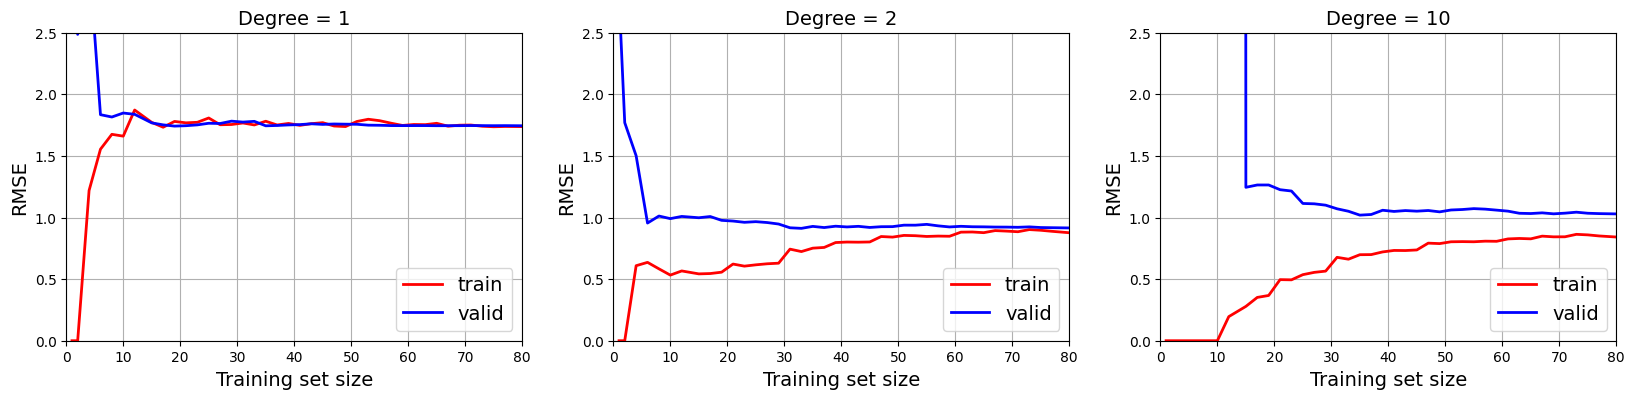

In [40]:
from sklearn.model_selection import learning_curve

degrees = [1, 2, 10]

plt.figure(figsize=(20, 4))

for i, degree in enumerate(degrees):
  polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
  )
  train_sizes, train_scores, valid_scores = learning_curve(
      polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
      scoring="neg_root_mean_squared_error"
  )

  train_errors = -train_scores.mean(axis=1)
  valid_errors = -valid_scores.mean(axis=1)

  plt.subplot(1, len(degrees), i + 1)
  plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
  plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")

  plt.xlabel("Training set size")
  plt.ylabel("RMSE")
  plt.grid()
  plt.legend(loc="lower right")
  plt.axis([0, 80, 0, 2.5])
  plt.title(f"Degree = {degree}")

plt.show()

The model with degree=1 is underfitting the training data, whereas the model with degree=10 is overfitting the training data.

### Bias/Variance Trade-Off

* Bias: Generalization error resulting from incorrect assumptions. For example, assuming the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data. **More data will not improve the situation; what is needed is a more complex model or better features**

* Variance: Generalization error caused by the model's excessive sensitivity to minor variations in the training data. Models with high degrees of freedom (i.e. high-degree polynomials) tend to have high variance and are inclined to overfit the training data. **To reduce variance, one might consider obtaining more data, employing less complex models, or applying regularization techniques to constrain the model.**

In general increasing a model's complexity will increase its variance and reduce its bias. Conversely, decreasing a model's complexity will decrease its variance and increase its bias. This interplay is commonly referred to as the bias/variance trade-off.

## Regularized Linear Models

Regularizing (or constraining) a model can reduce overfitting, effectively increasing its bias and reducing its variance.

Polynomial models can be regularized by decreasing the number of polynomial degrees, and linear models can be regularized by imposing constraints on the model's weights.

### Ridge Regression ($\ell_2$)

Is a regularized version of linear regression where a regularization term $\frac{\alpha}{m}\sum_{i=1}^{n} \theta_i^2$ is added to the MSE as a cost function. This additional term constrains the weights and keeps them as small as possible while fitting the training data.

It is typical to use $J(\bf{\Theta})$ to refer to cost functions that do not have a short name. For Ridge regression the cost function:

$$
J(\bf{\Theta}) = \text{MSE}(\bf{\Theta}) + \frac{\alpha}{m}
\sum_{i=1}^{n} \theta_{i}^{2}
$$

$$
J(\bf{\Theta}) = \frac{1}{m}\sum_{i=1}^{m} (\bf{\Theta}^{T}X^{(i)}-y^{(i)})^2 + \frac{\alpha}{m}
\sum_{i=1}^{n} \theta_{i}^{2}
$$

The bias $\theta_0$ is not usualy regularized, that's why the additional term doesn't include it and the sum starts at $i=1$ not 0.

$\alpha$ is a hyperparameter that controls how much the model should be regularized. If $\alpha = 0$ then the cost function is just linear regression; however, if $\alpha$ is very large, then all weights end up very close to zero (except the bias $\theta_0$) and the result is a flat line going through the data's mean.

If ${\bf w}$ is the vector of feature weights $\theta_1$ to $\theta_n$. Then $||{\bf w}||_2 = \sqrt{\sum_{i=1}^{n} \theta_{i}^{2}}$  is the $\ell_2$ Norm of the weight vector (dose not include the bias). Of course $||{\bf w}||_2^2=\sum_{i=1}^{n} \theta_{i}^{2}$ is the square of the $\ell_2$ norm. That's why ridge regression is sometimes called $\ell_2$ regularization.

----

**Note:** The cost function is used during training only. Once the model is trained unregularized perfromance metric should be used (i.e. MSE or RMSE without the extra regularization term)

**Note:** The input features should be of the same scale (i.e. use `StandardScaler`) because Ridge regression is sensitive to the input scale (this applies to most regularized models)

----

For batch gradient descent, the gradient of the cost function with regard to each model parameter $\theta_j$ (except the bias) is:

$$
\frac{\partial}{\partial \theta_j} J({\bf \Theta}) = \frac{2}{m}
\sum_{i=1}^{m} ({\bf \Theta}^T X^{(i)} - y^{(i)})x_j^{(i)} +
\frac{2 \alpha}{m}\theta_j
$$

The gradient vector becomes:

$$
\nabla_\Theta J({\bf \Theta}) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}({\bf \Theta}) \\
\frac{\partial}{\partial \theta_1}J({\bf \Theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n}J({\bf \Theta}) \\
\end{bmatrix}
= \frac{2}{m}X^T(X{\bf \Theta}-y) +
\begin{bmatrix}
0 \\
\frac{2 \alpha}{m}{\bf W}
\end{bmatrix}
$$

Where ${\bf \Theta}$ is the feature vector including the bias and ${\bf W}$ is the weight vector without the bias

Ridge regression can also be computed using a closed-form equation (might be slow and numerically unstable):

$$
\hat{{\bf \Theta}}=({\bf X}^T{\bf X} + \alpha {\bf A})^{-1}{\bf X}^T{\bf Y}
$$

Where ${\bf A}$ is the $(n + 1) \times (n + 1)$ identity matrix ${\bf I}$ with the top-left cell equal to 0 so the bias is not regularized.


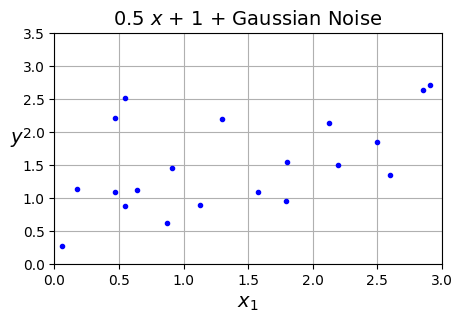

In [41]:
# Generate very noisy linear data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1) # random numbers uniformly distributed [0, 3]

theta0 = 1
theta1 = 0.5

y = theta0 + theta1 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)
X_new_b = add_dummy_feature(X_new)

plt.figure(figsize=(5, 3))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.title(f"{theta1} $x$ + {theta0} + Gaussian Noise")
plt.show()

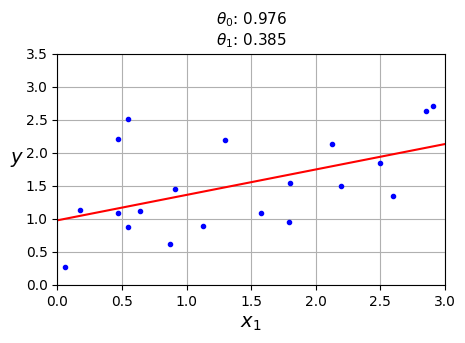

In [42]:
# Ridge Regression using Batch Gradient Descent

# Learning rate
eta = 0.1

# Regularization factor
#alpha = 1
alpha = 0 # without regularization

# Number of epochs (i.e. steps)
n_epochs = 1000

X_b = add_dummy_feature(X)

m = len(X_b) # number of training instances

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
  regularizer = 2 * alpha / m * theta
  regularizer[0] = 0 # bias term is not regularized
  gradients = 2 / m * X_b.T @ (X_b @ theta - y) + regularizer
  theta = theta - eta * gradients


# Plotting the predictions
y_new = X_new_b @ theta

plt.figure(figsize=(5, 3))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.title(fr"$\theta_0$: {theta[0][0]:.3f}" + "\n" + fr"$\theta_1$: {theta[1][0]:.3f}", fontsize=11)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

#### Using `sklearn`'s `Ridge` and `SGDRegressor`

`Ridge`: **Closed-form solution solver**

In [43]:
# Using Ridge with ‘cholesky’ solver

# 'cholesky’ solver uses the standard scipy.linalg.solve function to obtain a
# closed-form solution.

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.intercept_, ridge_reg.coef_

(array([1.00650911]), array([0.36280369]))

`Ridge`: **Variant of Stochastic Gradient Descent solution solver**

In [44]:
# Using Ridge with 'saga' solver

# uses a Stochastic Average Gradient Descent, and ‘saga’ uses its improved,
# unbiased version named SAGA. Both methods also use an iterative procedure, and
# are often faster than other solvers when both n_samples and n_features are
# large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on
# features with approximately the same scale. You can preprocess the data with a
# scaler from sklearn.preprocessing.

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver="saga", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.intercept_, ridge_reg.coef_

(array([1.00652337]), array([0.36279331]))

`SGDRegressor` **with $\ell_2$ penalty**

In [45]:
# Using SGDRegressor with 'l2' penalty

# To get the same result as Ridge, use alpha = 1 / m
# The 'l2' penality regularizes (MSE + alpha X 'l2' squared) without dividing by m

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    penalty='l2', alpha=1/m,
    max_iter=1000,
    eta0=0.01, tol=1e-5, n_iter_no_change=100,
    random_state=42
)

# fit X not X_b as SGDRegressor will add the dummy feature automatically
# use y.ravel not y because fit() expects 1D targets of the shape (100, ) as opposed of (100, 1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([0.98381933]), array([0.3754857]))

#### Showing the effect of $\alpha$

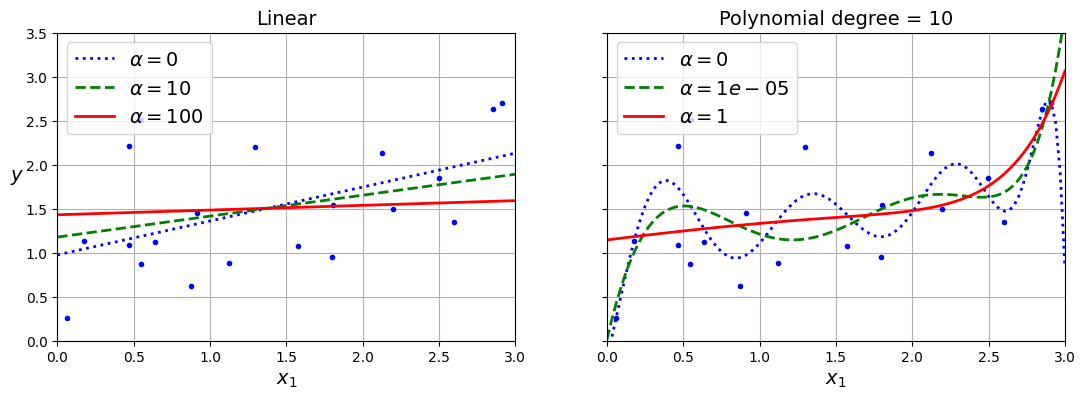

In [46]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.")
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(13, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.title("Linear")
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Polynomial degree = 10")
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

The left side figure shows linear regression with different amount of regularization controlled by $\alpha$ (`LinearRegression` for $\alpha=0$ or `Ridge` for $\alpha \neq 0$) .

The right side figure shows a 10th degree polynomial fitted to the data with different amount of regularization (i.e. different $\alpha$ values)

Increasing $\alpha$ leads to flatter (less extreme, more reasonable) predictions.

In other words increasing $\alpha$ increases the model's bias and decreases its variance

### Lasso Regression ($\ell_1$)

Lasso Regression, short for _**Least Absolute Shrinkage and Selection Operator**_, is another regularized version of linear regression. Lasso adds the $\ell_1$ norm to the cost function, which tends to eliminate the parameters of the least important features (i.e. set them to zero). In other words it perform automatic feature selection.

The cost function is regularized using the $\ell_1$ norm instead of the squared $\ell_2$ norm and that's why it is sometimes referred to as $\ell_1$ regularization.

If ${\bf w}$ is the vector of feature parameters $\theta_1$ to $\theta_n$. Then $||{\bf w}||_1 = \sum_{i=1}^{n} |\theta_{i}|$  is the $\ell_1$ Norm of the weight vector (dose not include the bias).

The cost function:

$$
J({\bf \Theta}) = \text{MSE}({\bf \Theta}) + 2 \alpha
\sum_{i=1}^{n} |\theta_i|
$$

$$
J({\bf \Theta}) = \frac{1}{m}\sum_{i=1}^{m} ({\bf \Theta^{T}X^{(i)}-y^{(i)}})^2 + 2 \alpha
\sum_{i=1}^{n} |\theta_i|
$$

Note the Lasso regularizer is multiplied by $2\alpha$ (compared to $\frac{\alpha}{m}$ for $\ell_2$ regularization). These factors are chosen to ensure the optimal $\alpha$ value is independent from the training set size.

In [47]:
# Using Lasso

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.intercept_, lasso_reg.coef_

(array([1.14537356]), array([0.26167212]))

In [48]:
# Using SGDRegressor with 'l1' penalty

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    penalty='l1', alpha=0.1,
    max_iter=1000,
    eta0=0.01, tol=1e-5, n_iter_no_change=100,
    random_state=42
)

# fit X not X_b as SGDRegressor will add the dummy feature automatically
# use y.ravel not y because fit() expects 1D targets of the shape (100, ) as opposed of (100, 2)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([1.04966914]), array([0.31523823]))

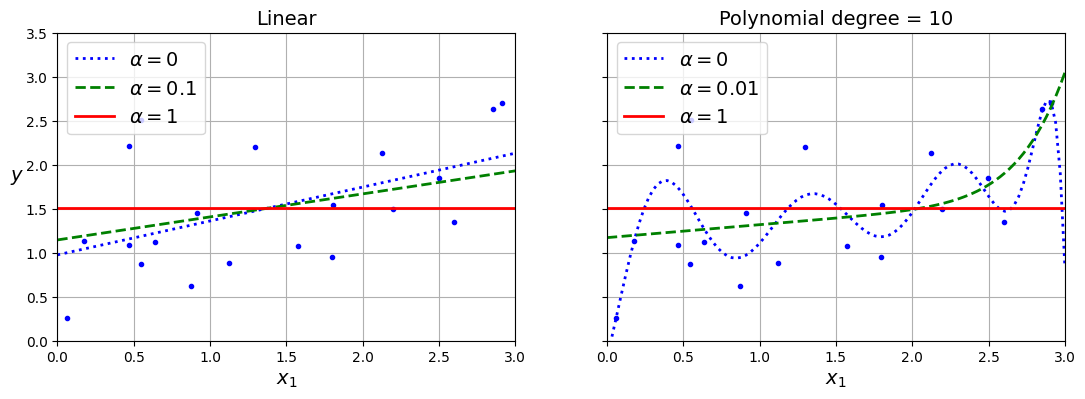

In [49]:
plt.figure(figsize=(13, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.title("Linear")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.title("Polynomial degree = 10")
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

The polynomial plot indicates that as alpha increases, the degree appears to decrease. This phenomenon arises because Lasso seems to be removing the least significant features, effectively performing feature selection and elimination.

### Elastic Net Regression

Elastic net's regularization term is a weighted sum of Ridge Regression ($\ell_2$) and Lasso Regression ($\ell_1$). So it is a middle ground between the two.

$$
J({\bf \Theta}) = \text{MSE}({\bf \Theta}) +
(1 - r)(\frac{\alpha}{m}\sum_{i=1}^{n} \theta_{i}^{2}) +
r (2 \alpha \sum_{i=1}^{n} |\theta_i|)
$$

$r$ allows you to control the mix ratio. If $r=0$ you get Ridge ($\ell_2$), if $r=1$ you get Lasso($\ell_1$).

You should always use some regularization and avoid unregularized models. Ridge ($\ell_2$) is a good starting point; however, if you think some features are not useful, you should use Lasso ($\ell_1$) or Elastic Net so their weights become 0. Elastic Net is a bit more preferable because Lasso ($\ell_1$) may behave erratically and mixing Ridge ($\ell_2$) can reduce such behaviour.




In [50]:
# Using ElasticNet

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.intercept_, elastic_net.coef_

(array([1.08639303]), array([0.30462619]))

In [51]:
# Using SGDRegressor with 'elasticnet' penalty

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    penalty='elasticnet', alpha=0.1, l1_ratio=0.5,
    max_iter=1000,
    eta0=0.01, tol=1e-5, n_iter_no_change=100,
    random_state=42
)

# fit X not X_b as SGDRegressor will add the dummy feature automatically
# use y.ravel not y because fit() expects 1D targets of the shape (100, ) as opposed of (100, 2)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([1.02098929]), array([0.3407524]))

### Early Stopping:

Early stopping is a regularization technique specifically applicable to iterative learning algorithms, such as Gradient Descent. Typically, during training, both training and validation errors decrease. However, at a certain point, the validation error reaches a minimum and begins to rise. This signifies that the model is starting to overfit the training set. At this crucial point, stop the training process to prevent further overfitting.

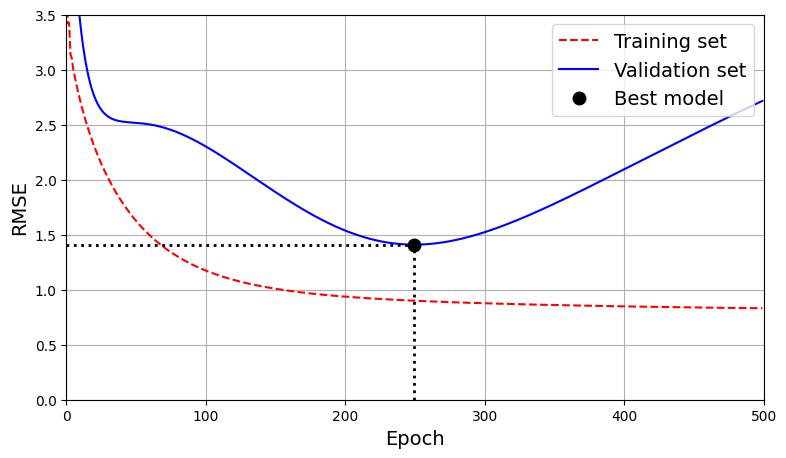

In [52]:
from copy import deepcopy
from sklearn.model_selection import train_test_split

# Generate a quadratic dataset

m = 100 # number of instances
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3

theta0 = 2    # bias
theta1 = 1    # X
theta2 = 0.5  # X**2

# Simple quadratic equation
y = theta0 + theta1 * X + theta2 * X**2 + np.random.randn(m , 1)

# split the data into train/validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, shuffle=False, random_state=42)
y_train = y_train.ravel()
y_valid = y_valid.ravel()

# Add 90 degree polynomial features and scale the features
preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

# Fit a gradient descent regressor
sgd_reg = SGDRegressor(
    penalty=None, eta0=0.002, random_state=42
)

n_epochs = 500
best_valid_rmse = float('inf')
train_errors = []
valid_errors = []

for epoch in range(n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train)
  y_valid_predict = sgd_reg.predict(X_valid_prep)

  # Validation error
  val_error = root_mean_squared_error(y_valid, y_valid_predict)
  valid_errors.append(val_error)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)
    best_epoch = epoch

  # Trainin error
  y_train_predict = sgd_reg.predict(X_train_prep)
  train_errors.append(root_mean_squared_error(y_train, y_train_predict))

plt.figure(figsize=(9, 5))
plt.plot(train_errors, "r--", label="Training set")
plt.plot(valid_errors, "b-", label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "ko", markersize=9, label="Best model")
plt.plot([best_epoch, best_epoch], [0, best_valid_rmse], "k:", linewidth=2)
plt.plot([0, best_epoch], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, n_epochs, 0, 3.5])
plt.legend(loc="upper right")
plt.show()